https://moviecultists.com/do-you-need-to-normalize-variables-for-logistic-regression

https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [2]:
heart = pd.read_csv("SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
heart.drop(['row.names'], axis=1, inplace=True)

In [4]:
Xa = heart[['age','ldl']]

In [5]:
ya = heart.chd

In [6]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.33, random_state=42)

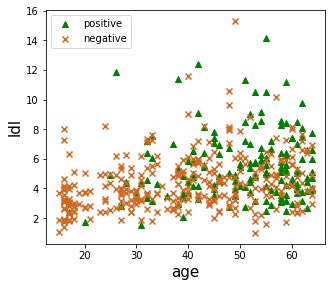

In [7]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logrega = LogisticRegression(solver='lbfgs', max_iter=1000)

In [10]:
logrega.fit(Xa_train, ya_train)
ya_pred = logrega.predict(Xa_test)

In [11]:
ya_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

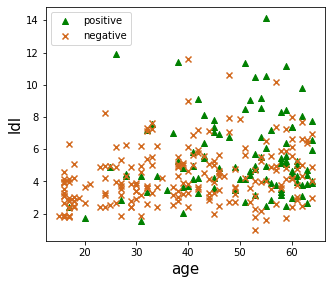

In [12]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

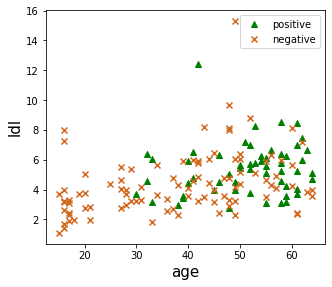

In [13]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [14]:
logrega.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([22]),
 'coef_': array([[0.05234073, 0.21692807]]),
 'intercept_': array([-4.09112497])}

In [15]:
_xa = np.linspace(14.0, 65.0, num=41)
_xa

array([14.   , 15.275, 16.55 , 17.825, 19.1  , 20.375, 21.65 , 22.925,
       24.2  , 25.475, 26.75 , 28.025, 29.3  , 30.575, 31.85 , 33.125,
       34.4  , 35.675, 36.95 , 38.225, 39.5  , 40.775, 42.05 , 43.325,
       44.6  , 45.875, 47.15 , 48.425, 49.7  , 50.975, 52.25 , 53.525,
       54.8  , 56.075, 57.35 , 58.625, 59.9  , 61.175, 62.45 , 63.725,
       65.   ])

In [16]:
_ya = (logrega.__dict__['intercept_'] * (-1.0) - logrega.__dict__['coef_'][0][0] * _xa ) \
    / logrega.__dict__['coef_'][0][1]

In [17]:
_ya

array([15.48142088, 15.17378693, 14.86615299, 14.55851904, 14.2508851 ,
       13.94325115, 13.63561721, 13.32798326, 13.02034932, 12.71271537,
       12.40508143, 12.09744748, 11.78981354, 11.48217959, 11.17454565,
       10.8669117 , 10.55927776, 10.25164381,  9.94400987,  9.63637592,
        9.32874198,  9.02110803,  8.71347409,  8.40584014,  8.0982062 ,
        7.79057225,  7.48293831,  7.17530436,  6.86767042,  6.56003647,
        6.25240253,  5.94476858,  5.63713464,  5.32950069,  5.02186675,
        4.71423281,  4.40659886,  4.09896492,  3.79133097,  3.48369703,
        3.17606308])

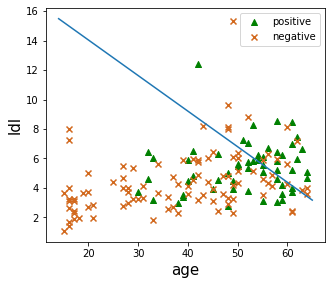

In [18]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

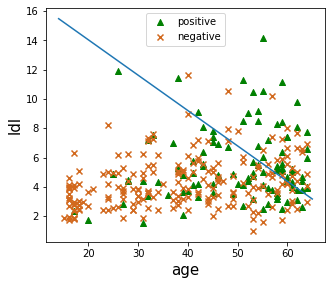

In [19]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

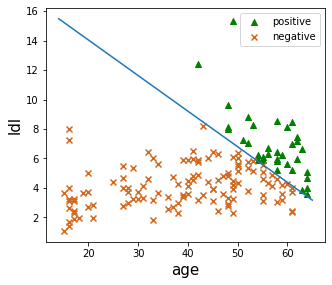

In [20]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_pred==1]["age"],Xa_test[ya_pred==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_pred==0]["age"],Xa_test[ya_pred==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [21]:
perfa = sklearn.metrics.confusion_matrix(ya_test, ya_pred)
print(perfa)
err_logrega = np.mean(ya_test != ya_pred)
print(err_logrega)
print(1 - sum(np.diag(perfa)) / float(len(ya_test)))
assert(np.round(err_logrega, 5) == 
       np.round(1 - sum(np.diag(perfa)) / float(len(ya_test)), 5))

[[83 14]
 [35 21]]
0.3202614379084967
0.3202614379084967


https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [22]:
from sklearn import preprocessing

In [23]:
Xb = heart[['age','ldl']]

In [24]:
yb = heart.iloc[:, -1]

In [25]:
scaler = preprocessing.StandardScaler().fit(Xb)

In [26]:
Xb_scaled = scaler.transform(Xb)

In [27]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 2,
 'n_samples_seen_': 462,
 'mean_': array([42.81601732,  4.74032468]),
 'var_': array([212.95965687,   4.27938193]),
 'scale_': array([14.59313732,  2.0686667 ])}

In [28]:
Xb_scaled.mean(axis=0)

array([-9.61232056e-18,  3.42198612e-16])

In [29]:
Xb_scaled.std(axis=0)

array([1., 1.])

In [30]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_scaled, yb, test_size=0.33, random_state=42)
logregb = LogisticRegression(solver='lbfgs', max_iter=1000)
logregb.fit(Xb_train, yb_train)
yb_pred = logregb.predict(Xb_test)
print(yb_pred)
print(logregb.__dict__)
perfb = sklearn.metrics.confusion_matrix(yb_test, yb_pred)
print(perfb)
err_logregb = np.mean(yb_test != yb_pred)
print(err_logregb)
print(1 - sum(np.diag(perfb)) / float(len(yb_test)))
assert(np.round(err_logregb, 5) == 
       np.round(1 - sum(np.diag(perfb)) / float(len(yb_test)), 5))

[0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 1]
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'lbfgs', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None, 'n_features_in_': 2, 'classes_': array([0, 1], dtype=int64), 'n_iter_': array([6]), 'coef_': array([[0.74748756, 0.44447108]]), 'intercept_': array([-0.81664493])}
[[83 14]
 [35 21]]
0.3202614379084967
0.3202614379084967


In [31]:
coefa = logrega.__dict__['coef_'][0]
coefb = logregb.__dict__['coef_'][0]
print(coefa)
print(coefb)

[0.05234073 0.21692807]
[0.74748756 0.44447108]


In [32]:
_xb = np.linspace(-1.8, 1.8, num=10)
_yb = (logregb.__dict__['intercept_'] * (-1.0) - logregb.__dict__['coef_'][0][0] * _xb ) \
    / logregb.__dict__['coef_'][0][1]
print(_xb)
print(_yb)

[-1.8 -1.4 -1.  -0.6 -0.2  0.2  0.6  1.   1.4  1.8]
[ 4.86448418  4.19178569  3.5190872   2.84638872  2.17369023  1.50099174
  0.82829325  0.15559476 -0.51710373 -1.18980221]


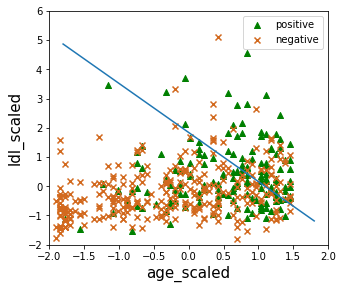

In [33]:
fig, ax = plt.subplots()
ax.scatter(Xb_scaled[heart["chd"]==1][:, 0],Xb_scaled[heart["chd"]==1][:, 1],marker='^',label='positive', color='green')
ax.scatter(Xb_scaled[heart["chd"]==0][:, 0],Xb_scaled[heart["chd"]==0][:, 1],marker='x',label='negative', color='chocolate')
plt.xlim([-2, 2])
plt.ylim([-2, 6])
plt.plot(_xb, _yb)
ax.set_xlabel('age_scaled', fontsize=15)
ax.set_ylabel('ldl_scaled', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [34]:
points = np.array([_xb, _yb]).T
points

array([[-1.8       ,  4.86448418],
       [-1.4       ,  4.19178569],
       [-1.        ,  3.5190872 ],
       [-0.6       ,  2.84638872],
       [-0.2       ,  2.17369023],
       [ 0.2       ,  1.50099174],
       [ 0.6       ,  0.82829325],
       [ 1.        ,  0.15559476],
       [ 1.4       , -0.51710373],
       [ 1.8       , -1.18980221]])

In [35]:
points_scaled_back = scaler.inverse_transform(points)
points_scaled_back

array([[16.54837014, 14.80332113],
       [22.38562507, 13.41173216],
       [28.22288   , 12.0201432 ],
       [34.06013492, 10.62855424],
       [39.89738985,  9.23696527],
       [45.73464478,  7.84537631],
       [51.57189971,  6.45378734],
       [57.40915464,  5.06219838],
       [63.24640957,  3.67060942],
       [69.08366449,  2.27902045]])

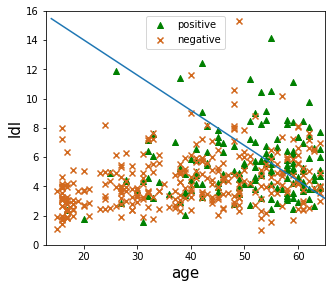

In [36]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.xlim([13, 65])
plt.ylim([0, 16])
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

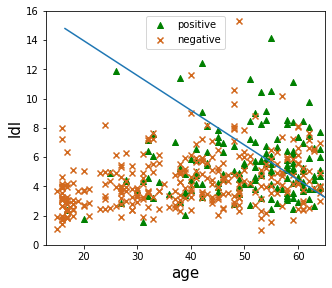

In [37]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.xlim([13, 65])
plt.ylim([0, 16])
plt.plot(points_scaled_back[:, 0], points_scaled_back[:, 1])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

## Figure 5.

Text(0.5, 1.0, 'Fig.5')

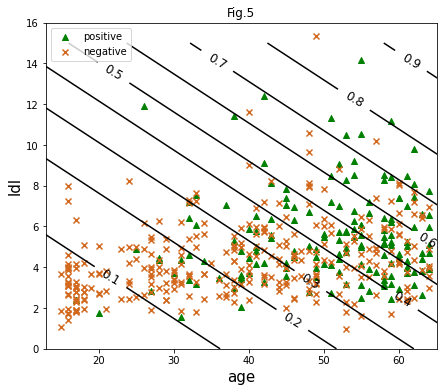

In [38]:
arr_age = np.arange(13, 70.2, 0.2)

arr_ldl = np.arange(0, 15.1, 0.1)

# The line below Equation (17c) 
[grid_X, grid_Y] = np.meshgrid(arr_age, arr_ldl)

def sigmoid(_age, _ldl):
    _z = logrega.__dict__['intercept_'] + \
         logrega.__dict__['coef_'][0][0] * _age + \
         logrega.__dict__['coef_'][0][1] * _ldl
    return 1 / (1 + np.exp(-1 * _z))

Z = sigmoid(grid_X, grid_Y)

fig, ax = plt.subplots()
ct = ax.contour(grid_X, grid_Y, Z, np.arange(0, 1, 0.1), colors='k')
ax.clabel(ct, fmt='%2.1f', fontsize=12, colors='k')

ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.xlim([13, 65])
plt.ylim([0, 16])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(7, 6)
ax.set_title('Fig.5')

## Figure 6.

In [39]:
logregb.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([6]),
 'coef_': array([[0.74748756, 0.44447108]]),
 'intercept_': array([-0.81664493])}

In [40]:
beta_age_scaled = logregb.__dict__['coef_'][0][0]
beta_ldl_scaled = logregb.__dict__['coef_'][0][1]
alpha_age_scaled = logregb.__dict__['intercept_'][0] / 2.0
alpha_ldl_scaled = logregb.__dict__['intercept_'][0] / 2.0

In [41]:
arr_age_scaled = np.linspace(-2.1, 2, num=20)
w_age = beta_age_scaled * arr_age_scaled + alpha_age_scaled

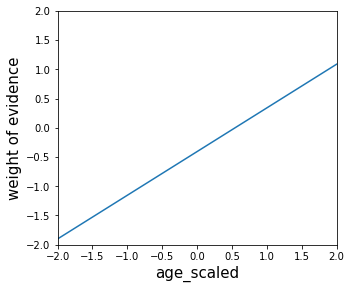

In [42]:
fig, ax = plt.subplots()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.plot(arr_age_scaled, w_age)
ax.set_xlabel('age_scaled', fontsize=15)
ax.set_ylabel('weight of evidence', fontsize=15)
fig.set_size_inches(5, 4.3)

In [43]:
arr_ldl_scaled = np.linspace(-2, 6, num=20)
w_ldl = beta_ldl_scaled * arr_ldl_scaled + alpha_ldl_scaled

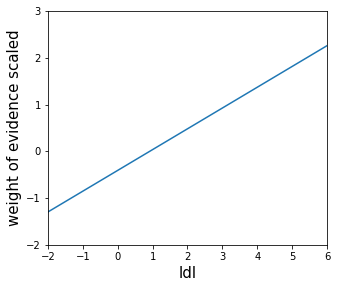

In [44]:
fig, ax = plt.subplots()
plt.xlim([-2, 6])
plt.ylim([-2, 3])
plt.plot(arr_ldl_scaled, w_ldl)
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('weight of evidence scaled', fontsize=15)
fig.set_size_inches(5, 4.3)

In [45]:
arr_to_scale_back = np.array([arr_age_scaled, arr_ldl_scaled]).T
arr_scaled_back = scaler.inverse_transform(arr_to_scale_back)
arr_scaled_back

array([[12.17042894,  0.60299127],
       [15.31947436,  1.47400883],
       [18.46851979,  2.34502639],
       [21.61756521,  3.21604395],
       [24.76661063,  4.08706151],
       [27.91565605,  4.95807907],
       [31.06470147,  5.82909662],
       [34.2137469 ,  6.70011418],
       [37.36279232,  7.57113174],
       [40.51183774,  8.4421493 ],
       [43.66088316,  9.31316686],
       [46.80992858, 10.18418442],
       [49.958974  , 11.05520198],
       [53.10801943, 11.92621954],
       [56.25706485, 12.7972371 ],
       [59.40611027, 13.66825466],
       [62.55515569, 14.53927222],
       [65.70420111, 15.41028978],
       [68.85324654, 16.28130734],
       [72.00229196, 17.15232489]])

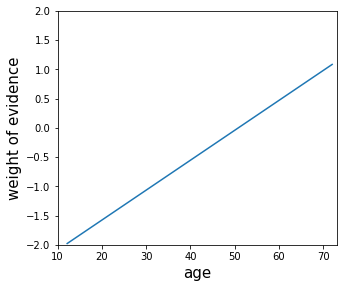

In [46]:
fig, ax = plt.subplots()
plt.xlim([10, 73])
plt.ylim([-2, 2])
plt.plot(arr_scaled_back[:, 0], w_age)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('weight of evidence', fontsize=15)
fig.set_size_inches(5, 4.3)

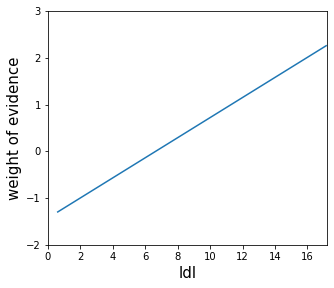

In [47]:
fig, ax = plt.subplots()
plt.xlim([0, 17.2])
plt.ylim([-2, 3])
plt.plot(arr_scaled_back[:, 1], w_ldl)
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('weight of evidence', fontsize=15)
fig.set_size_inches(5, 4.3)

In [48]:
slope_w_age = (w_age[10] - w_age[0]) / (arr_scaled_back[:, 0][10] - arr_scaled_back[:, 0][0])
slope_w_ldl = (w_ldl[10] - w_ldl[0]) / (arr_scaled_back[:, 1][10] - arr_scaled_back[:, 1][0])

In [49]:
def fun_w_age(_age):
    return slope_w_age * (_age - arr_scaled_back[:, 0][0]) + w_age[0]

def fun_w_ldl(_ldl):
    return slope_w_ldl * (_ldl - arr_scaled_back[:, 1][0]) + w_ldl[0]

def fun_inverse_w_age(_w):
    return 1 / slope_w_age * (_w - w_age[0]) + arr_scaled_back[:, 0][0]

def fun_inverse_w_ldl(_w):
    return 1 / slope_w_ldl * (_w - w_ldl[0]) + arr_scaled_back[:, 1][0]

In [50]:
fun_inverse_w_age(0)

50.78766278518525

In [51]:
fun_inverse_w_ldl(0)

6.640747733004127

Text(0.5, 1.0, 'Fig.6 Left')

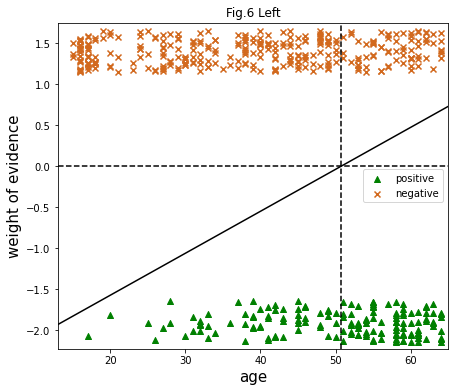

In [52]:
import random
arr_age_pos = heart[heart["chd"]==1]["age"]
arr_age_neg = heart[heart["chd"]==0]["age"]
weight_pos = np.array([-1.9 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_age_pos])
weight_neg = np.array([1.4 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_age_neg])

fig, ax = plt.subplots()
plt.xlim([13, 65])
plt.ylim([-2.23, 1.75])
ax.scatter(arr_age_pos, weight_pos, marker='^', label='positive', color='green')
ax.scatter(arr_age_neg, weight_neg, marker='x', label='negative', color='chocolate')
plt.plot([13, 65], [0, 0], linestyle='dashed', color='black')
plt.plot([fun_inverse_w_age(0), fun_inverse_w_age(0)], [-2.23, 1.75], linestyle='dashed', color='black')
plt.plot(arr_scaled_back[:, 0], w_age, color='k')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('weight of evidence', fontsize=15)
fig.set_size_inches(7, 6)
ax.legend()
ax.set_title('Fig.6 Left')

Text(0.5, 1.0, 'Fig.6 Right')

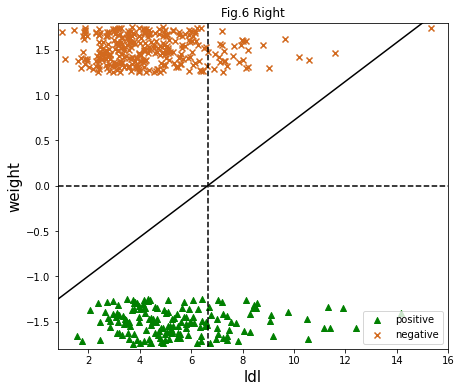

In [53]:
import random
arr_ldl_pos = heart[heart["chd"]==1]["ldl"]
arr_ldl_neg = heart[heart["chd"]==0]["ldl"]
weight_pos = np.array([-1.5 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_ldl_pos])
weight_neg = np.array([1.5 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_ldl_neg])

fig, ax = plt.subplots()
ax.scatter(arr_ldl_pos, weight_pos, marker='^', label='positive', color='green')
ax.scatter(arr_ldl_neg, weight_neg, marker='x', label='negative', color='chocolate')
_ylim = 1.8
plt.xlim([0.8, 16])
plt.ylim([-_ylim, _ylim])
plt.plot([0.8, 16], [0, 0], linestyle='dashed', color='black')
plt.plot([fun_inverse_w_ldl(0), fun_inverse_w_ldl(0)], [_ylim, -_ylim], linestyle='dashed', color='black')
plt.plot(arr_scaled_back[:, 1], w_ldl, color='k')
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('weight', fontsize=15)
ax.legend()
fig.set_size_inches(7, 6)
ax.set_title('Fig.6 Right')

## Figure 2(a)

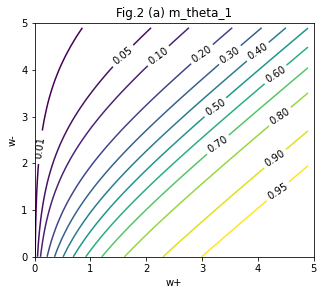

In [54]:
# (Equ.20a)
def mass_function_for_class_one(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_one = (1 - np.exp(-1 * W_pos)) * np.exp(-1 * W_neg) / (1 - ka)
    return m_theta_one

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_one(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (a) m_theta_1')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
plt.xlim([0, 5])
plt.ylim([0, 5])
fig.set_size_inches(5, 4.3)
  
plt.show()

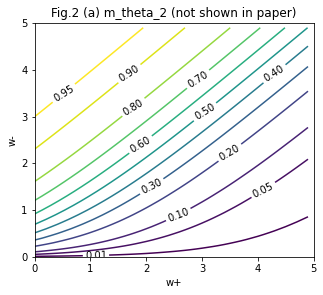

In [55]:
# (Equ.20a)
def mass_function_for_class_two(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_two = (1 - np.exp(-1 * W_neg)) * np.exp(-1 * W_pos) / (1 - ka)
    return m_theta_two

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_two(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (a) m_theta_2 (not shown in paper)')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
fig.set_size_inches(5, 4.3)
plt.xlim([0, 5])
plt.ylim([0, 5])
  
plt.show()

## Figure 2(b)

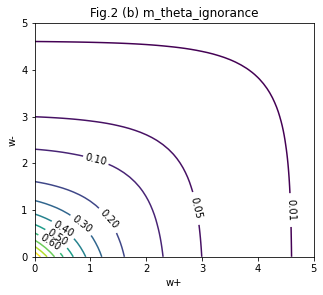

In [56]:
# (Equ.20a)
def mass_function_for_class_ignorance(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_one = np.exp(-1 * W_pos - W_neg) / (1 - ka)
    return m_theta_one

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_ignorance(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (b) m_theta_ignorance')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
fig.set_size_inches(5, 4.3)
plt.xlim([0, 5])
plt.ylim([0, 5])
  
plt.show()

## Figure 2(c)

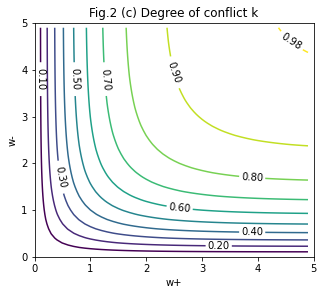

In [57]:
# Definition of the degree of conflict k=[1-exp(-w^+)]*[1-exp(-w^-)] (Equ.21c)
def degree_of_conflict(W_pos, W_neg):
    ka = (1 - np.exp(-1  * W_pos)) * (1 - np.exp(-1 * W_neg))
    return ka

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = degree_of_conflict(grid_X, grid_Y)
ct = ax.contour(grid_X, grid_Y, Z, list(np.arange(0.1, 1, 0.1)) + [0.98])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (c) Degree of conflict k')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
plt.xlim([0, 5])
plt.ylim([0, 5])
fig.set_size_inches(5, 4.3)
  
plt.show()

## Figure 7.

In [58]:
# equation (20a)
def mass_function_for_class_one(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_one = (1 - np.exp(-1 * w_pos)) * np.exp(-1 * w_neg) / (1 - ka)
    return mass_theta_one

# equation (20b)
def mass_function_for_class_two(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_two = (1 - np.exp(-1 * w_neg)) * np.exp(-1 * w_pos) / (1 - ka)
    return mass_theta_two

# equation (20c)
def mass_function_for_class_ignorance(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_ignorance = np.exp((-1) * w_pos - w_neg) / (1 - ka)
    return mass_theta_ignorance

Text(0.5, 1.0, 'Fig.7 Left')

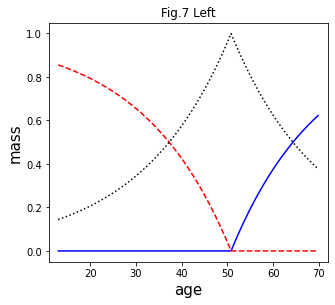

In [59]:
def w_pos_age(_age):
    w = fun_w_age(_age)
    if w <= 0:
        w = 0
    return w

def w_neg_age(_age):
    w = fun_w_age(_age)
    if w >= 0:
        w = 0
    else:
        w *= -1
    return w

arr_age = np.arange(13, 70, 0.2)
arr_w_pos_age = np.array(list(map(w_pos_age, arr_age)))
arr_w_neg_age = np.array(list(map(w_neg_age, arr_age)))

mass_theta_one = mass_function_for_class_one(arr_w_pos_age, arr_w_neg_age)
mass_theta_two = mass_function_for_class_two(arr_w_pos_age, arr_w_neg_age)
mass_theta_ignorance = mass_function_for_class_ignorance(arr_w_pos_age, arr_w_neg_age)

fig, ax = plt.subplots()
plt.xlim([11, 72])
plt.ylim([-0.05, 1.05])
plt.plot(arr_age, mass_theta_one, linestyle='-', color='blue')
plt.plot(arr_age, mass_theta_two, linestyle='--', color='red')
plt.plot(arr_age, mass_theta_ignorance, linestyle=':', color='black')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('mass', fontsize=15)
fig.set_size_inches(5, 4.4)
ax.set_title('Fig.7 Left')

Text(0.5, 1.0, 'Fig.7 Right')

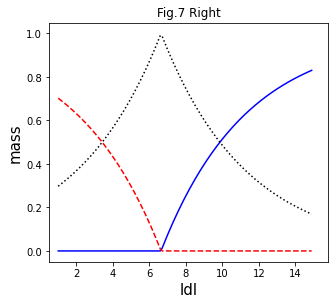

In [60]:
def w_pos_ldl(_ldl):
    w =  fun_w_ldl(_ldl)
    if w <= 0:
        w = 0
    return w

def w_neg_ldl(_ldl):
    w = fun_w_ldl(_ldl)
    if w >= 0:
        w = 0
    else:
        w *= -1
    return w

arr_ldl = np.arange(1, 15, 0.1)
arr_w_pos_ldl = np.array(list(map(w_pos_ldl, arr_ldl)))
arr_w_neg_ldl = np.array(list(map(w_neg_ldl, arr_ldl)))

mass_theta_one = mass_function_for_class_one(arr_w_pos_ldl, arr_w_neg_ldl)
mass_theta_two = mass_function_for_class_two(arr_w_pos_ldl, arr_w_neg_ldl)
mass_theta_ignorance = mass_function_for_class_ignorance(arr_w_pos_ldl, arr_w_neg_ldl)

fig, ax = plt.subplots()
plt.xlim([0.5, 15.8])
plt.ylim([-0.05, 1.05])
plt.plot(arr_ldl, mass_theta_one, linestyle='-', color='blue')
plt.plot(arr_ldl, mass_theta_two, linestyle='--', color='red')
plt.plot(arr_ldl, mass_theta_ignorance, linestyle=':', color='black')
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('mass', fontsize=15)
fig.set_size_inches(5, 4.4)
ax.set_title('Fig.7 Right')

## Figure 8 (a)

In [61]:
_xa2 = np.linspace(16.0, 70.0, num=100)
_ya2 = (logrega.__dict__['intercept_'] * (-1.0) - logrega.__dict__['coef_'][0][0] * _xa2 ) \
    / logrega.__dict__['coef_'][0][1]

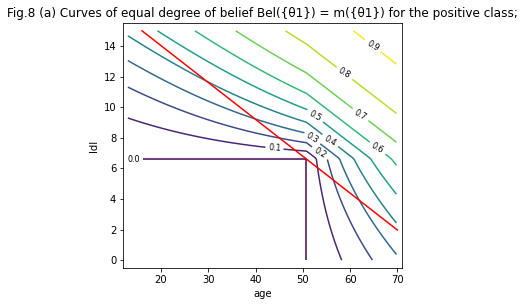

In [62]:
arr_ldl = np.arange(0, 15.1, 0.1)
arr_w_pos_ldl = np.array(list(map(w_pos_ldl, arr_ldl)))
arr_w_neg_ldl = np.array(list(map(w_neg_ldl, arr_ldl)))

arr_age = np.arange(13, 70, 0.2)
arr_w_pos_age = np.array(list(map(w_pos_age, arr_age)))
arr_w_neg_age = np.array(list(map(w_neg_age, arr_age)))

# The line below Equation (17c) 
Z_pos = np.matrix([list(arr_w_pos_age + x) \
        for x in arr_w_pos_ldl])
Z_neg = np.matrix([list(arr_w_neg_age + x) \
        for x in arr_w_neg_ldl])

# Equation (20a)
def mass_function_for_class_one(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_one = (1 - np.exp(-1 * w_pos)) * np.exp(-1 * w_neg) / (1 - ka)
    return mass_theta_one

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(mass_function_for_class_one)(Z_pos, Z_neg)
    
fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z, np.arange(0.0, 1.0, 0.1))
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ax.set_title('Fig.8 (a) Curves of equal degree of belief Bel({θ1}) = m({θ1}) for the positive class;')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()

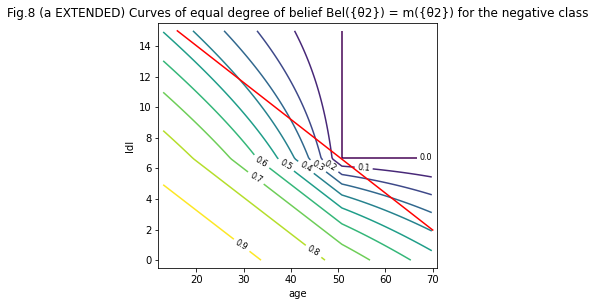

Note this figure above is essentially Figure 8 (b).


In [63]:
# equation (20b)
def mass_function_for_class_two(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_two = (1 - np.exp(-1 * w_neg)) * np.exp(-1 * w_pos) / (1 - ka)
    return mass_theta_two

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(mass_function_for_class_two)(Z_pos, Z_neg)

fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z, np.arange(0.0, 1.0, 0.1))
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ax.set_title('Fig.8 (a EXTENDED) Curves of equal degree of belief Bel({θ2}) = m({θ2}) for the negative class')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()
print('Note this figure above is essentially Figure 8 (b).')

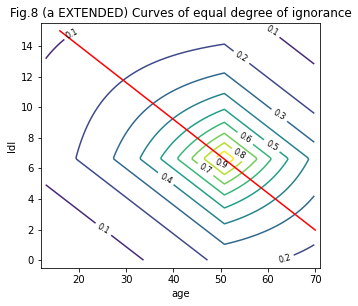

In [64]:
# equation (20c)
def mass_function_for_class_ignorance(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_ignorance = np.exp((-1) * w_pos - w_neg) / (1 - ka)
    return mass_theta_ignorance

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(mass_function_for_class_ignorance)(Z_pos, Z_neg)
    
fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z, np.arange(0.0, 1.0, 0.1))
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ax.set_title('Fig.8 (a EXTENDED) Curves of equal degree of ignorance')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()

## Figure 8 (b)

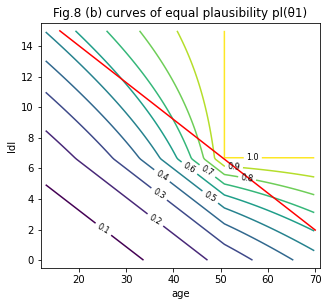

In [65]:
# equation (22a)
def plausibility_for_class_one(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    plausibility = np.exp(-1 * w_neg) / (1 - ka)
    return plausibility

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(plausibility_for_class_one)(Z_pos, Z_neg)
    
fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z, list(np.arange(0.1, 1.0, 0.1)) + [0.9999] )
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ax.set_title('Fig.8 (b) curves of equal plausibility pl(θ1)')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()

## Figure 8 (c)

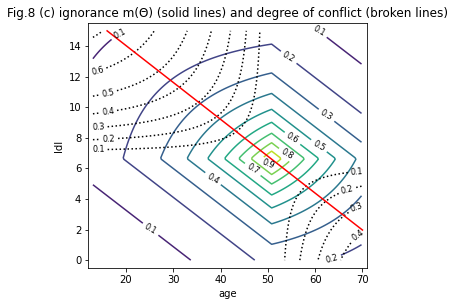

In [66]:
# equation (20c)
def mass_function_for_class_ignorance(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_ignorance = np.exp((-1) * w_pos - w_neg) / (1 - ka)
    return mass_theta_ignorance

# equation (21)
def conflict_degree(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    return ka

# https://stackoverflow.com/questions/61899911
Z_ignorance = np.vectorize(mass_function_for_class_ignorance)(Z_pos, Z_neg)
Z_conflict = np.vectorize(conflict_degree)(Z_pos, Z_neg)

fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z_ignorance, np.arange(0.0, 1.1, 0.1))
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ct = ax.contour(arr_age, arr_ldl, Z_conflict, 
        np.arange(0.1, 1.1, 0.1), linestyles=':', colors='k')
ax.clabel(ct, colors='k', fmt='%2.1f', fontsize=8)
ax.set_title('Fig.8 (c) ignorance m(Θ) (solid lines) and degree of conflict (broken lines)')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()

## Figure 8 (d)

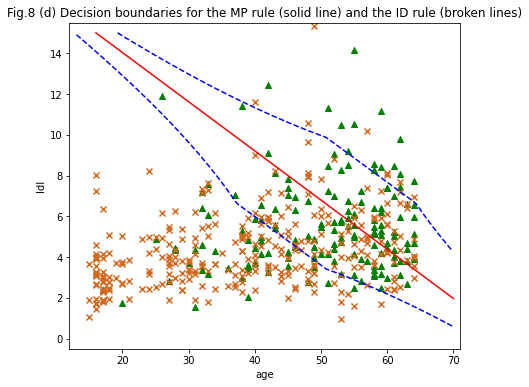

In [67]:
# Equation (20a)
def mass_function_for_class_one(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_one = (1 - np.exp(-1 * w_pos)) * np.exp(-1 * w_neg) / (1 - ka)
    return mass_theta_one

# https://stackoverflow.com/questions/61899911
Z_one = np.vectorize(mass_function_for_class_one)(Z_pos, Z_neg)

# equation (20b)
def mass_function_for_class_two(w_pos, w_neg):
    ka = (1 - np.exp(-1 * w_pos)) * (1 - np.exp(-1 * w_neg))
    mass_theta_two = (1 - np.exp(-1 * w_neg)) * np.exp(-1 * w_pos) / (1 - ka)
    return mass_theta_two

# https://stackoverflow.com/questions/61899911
Z_two = np.vectorize(mass_function_for_class_two)(Z_pos, Z_neg)

fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.contour(arr_age, arr_ldl, Z_one, 
        [0.5], linestyles='--', colors='blue')
ax.contour(arr_age, arr_ldl, Z_two, 
        [0.5], linestyles='--', colors='blue')
ax.set_title('Fig.8 (d) Decision boundaries for the MP rule (solid line) and the ID rule (broken lines)')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(7, 6)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.plot(_xa2, _ya2, color='red')
plt.show()